<a href="https://colab.research.google.com/github/felixbeutter/IGL-tutorials/blob/antspy_registration_tutorial/ANTsPy_registration_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.append("/content/drive/MyDrive/venv/lib/python3.10/site-packages")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# manage imports and prepare colab notebook (access to google drive access for needed files and required python packages)

import os, sys, ants, antspynet

from google.colab import drive
drive.mount("/content/drive")

sys.path.append("/content/drive/MyDrive/venv/lib/python3.10/site-packages")

ASSETS = '/content/drive/MyDrive/assets/antspy_registration_tutorial/'

In [19]:
# load sample images (t1, lesion) and t1 brain atlas (MNI152)

t1_image = ants.image_read(ASSETS + 't1.nii.gz')
lesion_image = ants.image_read(ASSETS + 'lesion.nii.gz')

t1_atlas = ants.image_read(ASSETS + 'MNI152_t1_1mm_brain.nii.gz')

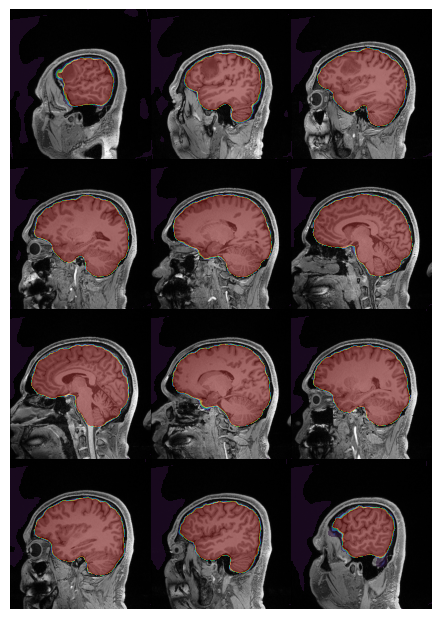

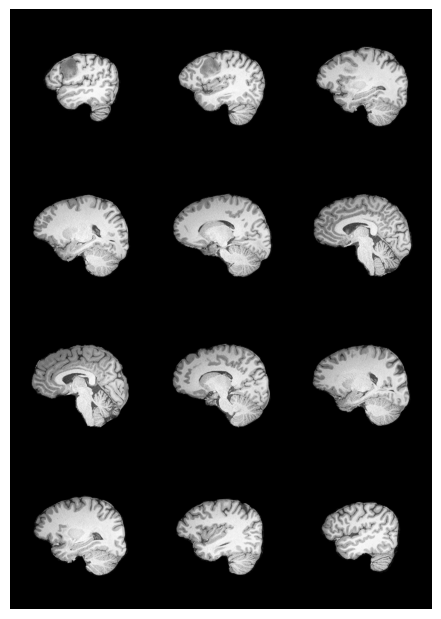

In [20]:
# brain extraction (skull stripping) and visualization

t1_brain_mask = antspynet.brain_extraction(t1_image, modality='t1')
ants.plot(t1_image, overlay=t1_brain_mask, overlay_alpha=0.5)

t1_brain = t1_image * t1_brain_mask
ants.plot(t1_brain);

# ants.image_write(t1_brain, ASSETS + 't1_brain.nii.gz')  # if applicable, export skull-stripped t1 as NIfTI

In [31]:
# perform registration (transformation of t1 and lesion coordinate systems to atlas coordinate system)
# using symmetric normalization (for different types of transform see ANTs registration documentation)

transform_list = ants.registration(fixed=t1_atlas, moving=t1_brain, type_of_transform='SyN', masks=(None, lesion_image))

transformed_brain = ants.apply_transforms(fixed=t1_atlas, moving=t1_brain, transformlist=transform_list['fwdtransforms'])
transformed_lesion = ants.apply_transforms(fixed=t1_atlas, moving=lesion_image, transformlist=transform_list['fwdtransforms'])

In [33]:
# export transformed brain image and lesion mask

ants.image_write(transformed_brain, ASSETS + 't1_brain_registered.nii.gz')
ants.image_write(transformed_lesion, ASSETS + 'lesion_registered.nii.gz')

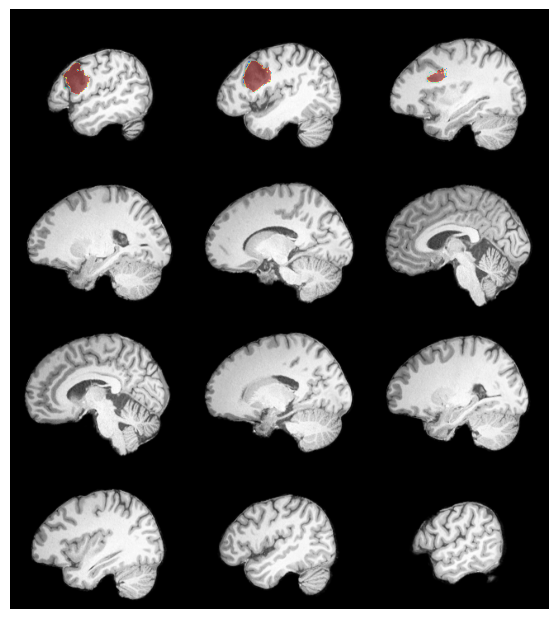

In [34]:
# visualize results (overlaying registered extracted brain and lesion images)

ants.plot(transformed_brain, overlay=transformed_lesion, overlay_alpha=0.5, overlay_cmap='jet')